<a href="https://colab.research.google.com/github/Vartika-DA/E-Commerce/blob/main/Vartika_Jain_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Sales Analysis**

**Let's Import Important Libraries**

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Jobaaj/sales_dataset.csv")      #Reading Dataset
df.head(5)

/tmp/ipython-input-11-838342494.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Jobaaj/sales_dataset.csv")      #Reading Dataset


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


**Understanding Datatset**

In [12]:

print("Rows, Columns:", df.shape)
print("\nColumn Names:\n", df.columns)

Rows, Columns: (128949, 23)

Column Names:
 Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


**Checking Datatype and missing values**

In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


**Filling NA Courier Status with "Unknown"**

In [14]:
df['Courier Status'] = df['Courier Status'].fillna('Unknown')

**Filling NA Currency Status with "INR"**

In [15]:
df['currency'] = df['currency'].fillna('INR')  # Assuming INR is the main currency used

**Filling 'Promotion IDs' NA with "No Promotion"**

In [16]:
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

**Basic Cleaning for unimportant Columns**

In [17]:
df['fulfilled-by'] = df['fulfilled-by'].fillna('Not Mentioned')
df = df.drop(columns=['Unnamed: 22'])

**Convert the Date Column**

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y',errors='coerce')

**Handling Amount Missing Values**

In [26]:
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0                                           #Replacing Null with 0 where status is "cancelled"

**Fill Remaining Null Values using "Median"**

In [28]:
median_value = df['Amount'].median()
df['Amount'] = df['Amount'].fillna(median_value)

**Dropping missing rows (affecting less than 0.03% of dataset)**

In [32]:
# Drop rows where any shipping info is missing
df = df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'])

In [34]:
df.dtypes

,0
Order ID,object
Date,datetime64[ns]
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object
Size,object


**Handling Duplicates**

In [39]:
# Find duplicate rows based on Order ID, ASIN, and SKU   (Gives us exact duplicates)
duplicates = df[df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False)]

# Display the duplicates
print("Number of duplicates found:", len(duplicates))
duplicates.head()


Number of duplicates found: 0


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by


In [38]:
# Remove duplicate rows based on Order ID, ASIN, and SKU
df = df.drop_duplicates(subset=['Order ID', 'ASIN', 'SKU'], keep='first')

**Renaming Column Names for better Readbility and accesibility**

In [41]:
df = df.rename(columns={
    'Order ID': 'order_id',
    'Date': 'order_date',
    'Status': 'order_status',
    'Fulfilment': 'fulfilment_type',
    'Sales Channel': 'sales_channel',
    'ship-service-level': 'shipping_level',
    'Style': 'product_style',
    'SKU': 'sku_code',
    'Category': 'product_category',
    'Size': 'product_size',
    'ASIN': 'asin',
    'Courier Status': 'courier_status',
    'Qty': 'quantity',
    'currency': 'currency',
    'Amount': 'order_amount',
    'ship-city': 'ship_city',
    'ship-state': 'ship_state',
    'ship-postal-code': 'ship_postal_code',
    'ship-country': 'ship_country',
    'promotion-ids': 'promotion_ids',
    'B2B': 'is_b2b',
    'fulfilled-by': 'fulfilled_by'
})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128909 entries, 0 to 128948
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          128909 non-null  object        
 1   order_date        128909 non-null  datetime64[ns]
 2   order_status      128909 non-null  object        
 3   fulfilment_type   128909 non-null  object        
 4   Sales Channel     128909 non-null  object        
 5   shipping_level    128909 non-null  object        
 6   product_style     128909 non-null  object        
 7   sku_code          128909 non-null  object        
 8   product_category  128909 non-null  object        
 9   product_size      128909 non-null  object        
 10  asin              128909 non-null  object        
 11  courier_status    128909 non-null  object        
 12  quantity          128909 non-null  int64         
 13  currency          128909 non-null  object        
 14  order_amo

**📈 Step: Basic Summary Stats**

In [44]:
df.describe()

,order_date,quantity,order_amount,ship_postal_code
count,128909,128909.000000,128909.000000,128909.000000
mean,2022-05-12 11:48:26.636464640,0.904661,556.634414,463977.471860
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,376.000000,382421.000000
50%,2022-05-10 00:00:00,1.000000,545.000000,500033.000000
75%,2022-06-04 00:00:00,1.000000,760.000000,600024.000000
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,NaN,0.314746,346.488676,191471.789546


**Summary for Categorical Columns**

In [57]:
df['order_status'].value_counts()
print(df['order_status'].value_counts())
df['product_category'].value_counts()
print(df['product_category'].value_counts())

order_status
Shipped                          77747
Shipped - Delivered to Buyer     28764
Cancelled                        18331
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64
product_category
Set              50260
kurta            49845
Western Dress    15494
Top              10619
Ethnic Dress      1158
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64


**Unique & Missing Value Overview**

In [53]:
print("Unique Value Counts:")
print(df.nunique())

print("\nMissing Value Counts:")
print(df.isna().sum())

Unique Value Counts:
order_id            120324
order_date              91
order_status            13
fulfilment_type          2
Sales Channel            2
shipping_level           2
product_style         1377
sku_code              7195
product_category         9
product_size            11
asin                  7190
courier_status           4
quantity                10
currency                 1
order_amount           865
ship_city             8955
ship_state              69
ship_postal_code      9459
ship_country             1
promotion_ids         5788
is_b2b                   2
fulfilled_by             2
dtype: int64

Missing Value Counts:
order_id            0
order_date          0
order_status        0
fulfilment_type     0
Sales Channel       0
shipping_level      0
product_style       0
sku_code            0
product_category    0
product_size        0
asin                0
courier_status      0
quantity            0
currency            0
order_amount        0
ship_city          

# **Customer Insights Analysis**

**Top-Performing Locations by Sales Volume**

In [59]:
# Group by city and count orders
top_cities = df.groupby('ship_city')['order_id'].count().sort_values(ascending=False)

# Group by state
top_states = df.groupby('ship_state')['order_id'].count().sort_values(ascending=False)

print("Top Cities by Sales Volume:\n", top_cities.head(5))
print("\nTop States by Sales Volume:\n", top_states.head(5))

Top Cities by Sales Volume:
 ship_city
BENGALURU    11211
HYDERABAD     8071
MUMBAI        6124
NEW DELHI     5793
CHENNAI       5419
Name: order_id, dtype: int64

Top States by Sales Volume:
 ship_state
MAHARASHTRA      22256
KARNATAKA        17320
TAMIL NADU       11480
TELANGANA        11327
UTTAR PRADESH    10635
Name: order_id, dtype: int64


**Order Cancellation Trends**

In [63]:
# Create a cancellation flag
df['is_cancelled'] = df['order_status'].str.contains('Cancelled')

# Calculate cancellation rate by state
cancel_rate_state = (
    df.groupby('ship_state')['is_cancelled'].mean().sort_values(ascending=False)
)

print("States with Highest Cancellation Rates:\n", cancel_rate_state.head(5))

States with Highest Cancellation Rates:
 ship_state
APO                  1.000000
Meghalaya            1.000000
Arunachal Pradesh    0.333333
Rajshthan            0.333333
LAKSHADWEEP          0.250000
Name: is_cancelled, dtype: float64


**B2B vs. B2C Behavior**

In [64]:
# Group by B2B flag
b2b_summary = df.groupby('is_b2b')[['order_id', 'order_amount']].agg({
    'order_id': 'count',
    'order_amount': 'sum'
})

print("B2B vs B2C Summary:\n", b2b_summary)

B2B vs B2C Summary:
         order_id  order_amount
is_b2b                        
False     128038   71195240.62
True         871     559945.00


# **Financial Performance Analysis 💰**

**Total Revenue Over Time**

In [65]:
# Create a new column for Month
df['order_month'] = df['order_date'].dt.to_period('M')

# Group by month and sum revenue
monthly_revenue = df.groupby('order_month')['order_amount'].sum()

print("Monthly Revenue:\n", monthly_revenue.tail(6))  # Recent 6 months

Monthly Revenue:
 order_month
2022-03       95355.00
2022-04    26272649.62
2022-05    23974958.00
2022-06    21412223.00
Freq: M, Name: order_amount, dtype: float64


**Best-Selling Products**

In [68]:
# Total revenue per Category
product_category = df.groupby('product_category')['order_amount'].sum().sort_values(ascending=False)

print("Top Selling Category:\n",product_category.head(10))

Top Selling Category:
 product_category
Set              35768537.14
kurta            19466809.48
Western Dress    10207670.00
Top               4907932.00
Ethnic Dress       732061.00
Blouse             420569.00
Bottom             135998.00
Saree              114694.00
Dupatta               915.00
Name: order_amount, dtype: float64


**🧮 3. Average Order Value (AOV)**

In [69]:
aov = df['order_amount'].mean()
print("Average Order Value:", round(aov, 2))

Average Order Value: 556.63


## **Logistics & Fulfillment Optimization**

**Compare Fulfillment Method**

In [70]:
# Orders per fulfillment method
fulfillment_orders = df['fulfilled_by'].value_counts()

# Cancellation rate by method
cancel_rate_fulfillment = df.groupby('fulfilled_by')['is_cancelled'].mean().sort_values(ascending=False)

print("Orders by Fulfillment Type:\n", fulfillment_orders)
print("\nCancellation Rate by Fulfillment Type:\n", cancel_rate_fulfillment)

Orders by Fulfillment Type:
 fulfilled_by
Not Mentioned    89652
Easy Ship        39257
Name: count, dtype: int64

Cancellation Rate by Fulfillment Type:
 fulfilled_by
Easy Ship        0.174720
Not Mentioned    0.127961
Name: is_cancelled, dtype: float64


**Unshipped Orders by Fulfillment Method**

In [73]:
unshipped_by_fulfillment = df[df['courier_status'] == 'Unshipped']['fulfilled_by'].value_counts()
print("Unshipped Orders by Fulfillment Method:\n", unshipped_by_fulfillment)

Unshipped Orders by Fulfillment Method:
 fulfilled_by
Not Mentioned    6155
Easy Ship         524
Name: count, dtype: int64


# ** Product Management & Inventory Optimization**

**Identify High-Demand Product Categories**

In [74]:
# Total orders and revenue by category
category_demand = df.groupby('product_category')[['order_id', 'order_amount']].agg({
    'order_id': 'count',
    'order_amount': 'sum'
}).sort_values(by='order_id', ascending=False)

print("High-Demand Categories:\n", category_demand.head(10))

High-Demand Categories:
                   order_id  order_amount
product_category                        
Set                  50260   35768537.14
kurta                49845   19466809.48
Western Dress        15494   10207670.00
Top                  10619    4907932.00
Ethnic Dress          1158     732061.00
Blouse                 926     420569.00
Bottom                 440     135998.00
Saree                  164     114694.00
Dupatta                  3        915.00


**📊 Analyze Average Quantity Ordered**

In [75]:
avg_qty_per_category = df.groupby('product_category')['quantity'].mean().sort_values(ascending=False)
print("Average Quantity per Category:\n", avg_qty_per_category.head(10))

Average Quantity per Category:
 product_category
Dupatta          1.000000
Blouse           0.933045
Top              0.932291
Saree            0.926829
Ethnic Dress     0.908463
Bottom           0.904545
kurta            0.903461
Set              0.900816
Western Dress    0.899832
Name: quantity, dtype: float64


# **😊 Customer Satisfaction & Return**

**1. 📉 Investigate Return & Cancellation Rate**

In [76]:
cancel_rate_by_category = df.groupby('product_category')['is_cancelled'].mean().sort_values(ascending=False)
print("Highest Cancellation Rates by Category:\n", cancel_rate_by_category.head(10))

Highest Cancellation Rates by Category:
 product_category
Set              0.145961
kurta            0.145471
Western Dress    0.137150
Bottom           0.136364
Saree            0.128049
Ethnic Dress     0.126079
Blouse           0.125270
Top              0.120162
Dupatta          0.000000
Name: is_cancelled, dtype: float64


**🧪 Identify Problematic Products**

In [78]:
# Cancellation rate by product category
cancel_rate_by_category = df.groupby('product_category')['is_cancelled'].mean().sort_values(ascending=False)

# Display top 10 problematic categories
print("Highest Cancellation Rates by Category:\n", cancel_rate_by_category.head(10))

Highest Cancellation Rates by Category:
 product_category
Set              0.145961
kurta            0.145471
Western Dress    0.137150
Bottom           0.136364
Saree            0.128049
Ethnic Dress     0.126079
Blouse           0.125270
Top              0.120162
Dupatta          0.000000
Name: is_cancelled, dtype: float64


# **Top Product Categories by Revenue**

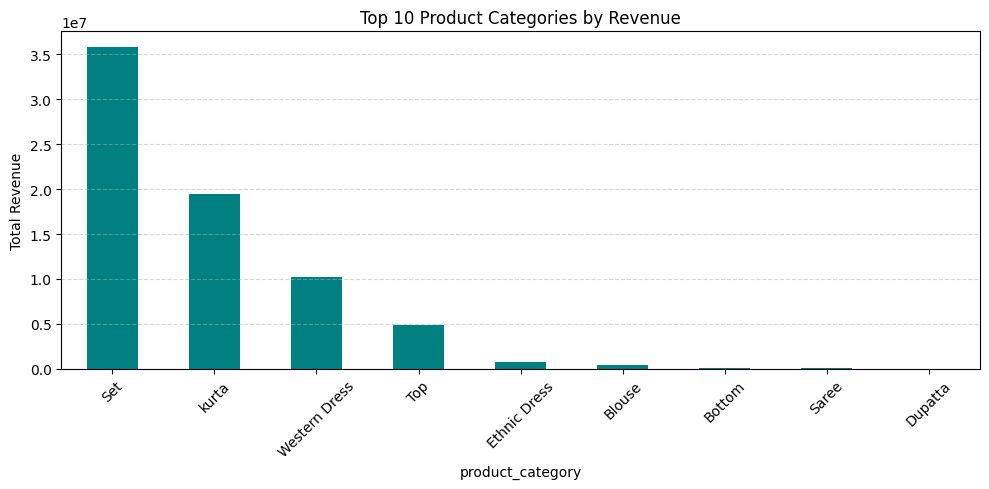

In [84]:
import matplotlib.pyplot as plt

top_categories = df.groupby('product_category')['order_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_categories.plot(kind='bar', color='Teal')
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Monthly Revenue Trend**

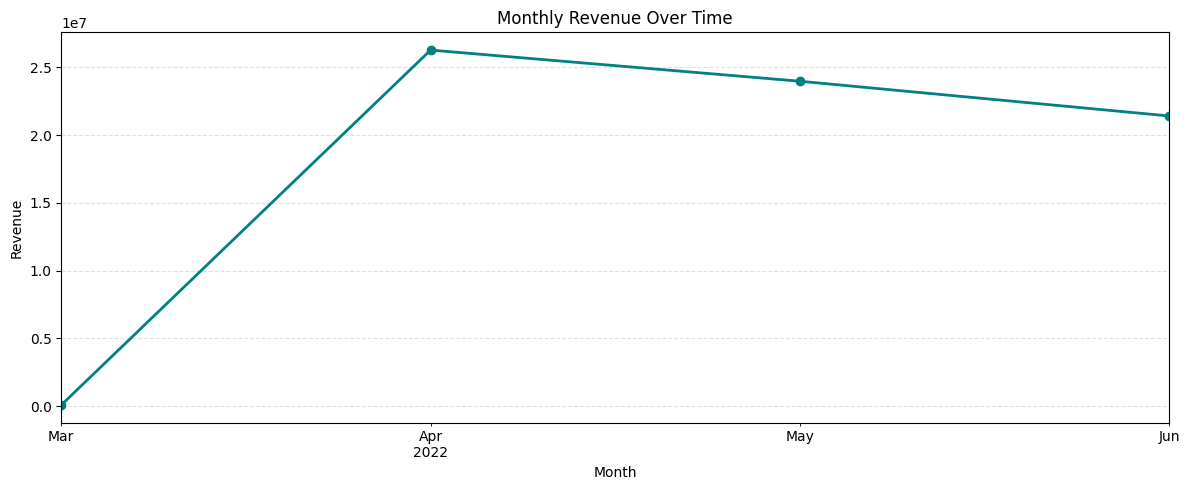

In [83]:
monthly_revenue = df.groupby('order_month')['order_amount'].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o', linewidth=2, color='Teal')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Top States by Total Orders**

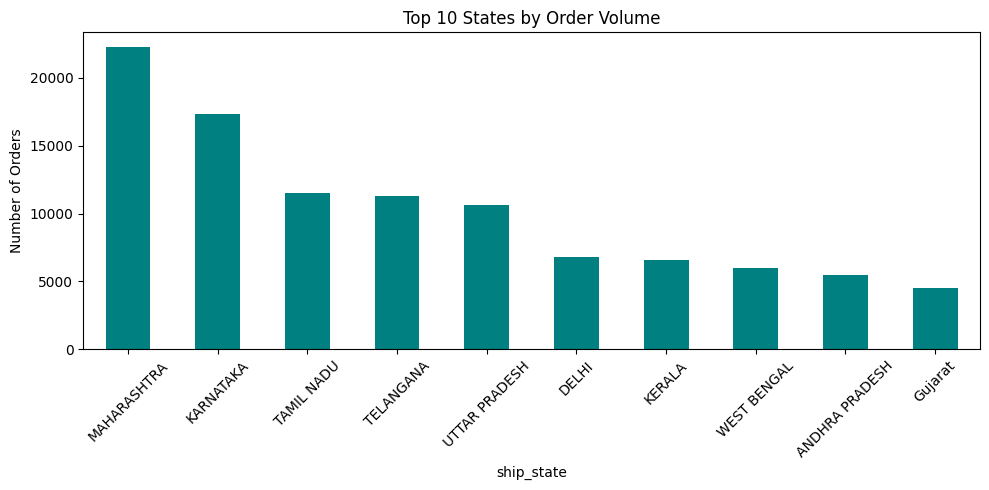

In [82]:
top_states = df.groupby('ship_state')['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_states.plot(kind='bar', color='Teal')
plt.title('Top 10 States by Order Volume')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **📊 Insights Summary**
**🔹 Customer Behavior & Sales Geography**
- The highest order volumes came from BENGALURU, HYDERABAD, and MUMBAI, while MAHARASHTRA and KARNATAKA led in total orders.
- Despite the volume dominance, cancellation rates peaked in states like Meghalaya, Arunachal Pradesh, and Lakshadweep, highlighting potential fulfillment challenges in remote regions.
- B2B orders, while only 871 transactions, generated ₹ 5.6 Lakh, indicating high value per order compared to B2C.

**🔹 Financial Performance**
- Revenue surged between April–June 2022, with peak monthly revenue hitting ₹ 2.6 Crore.
- The Average Order Value (AOV) across the dataset was ₹ 556.63, serving as a benchmark for pricing and campaign ROI.
- Top-revenue categories included Set, Kurta, and Western Dress—collectively driving the lion’s share of total earnings.

**🔹 Product Management & Inventory Optimization**
- Set and Kurta were both high in demand and had high cancellation rates—indicating possible fit, quality, or fulfillment issues.

**🔹 Customer Satisfaction & Returns**
- Cancellation rates were highest for Set, Kurta, and Western Dress, pointing to potential product or delivery friction.
- Categories like Dupatta had zero cancellations but extremely low volume, making them low risk but also low impact.



# **✅ Business Recommendations Based on Your Analysis**

**🛍️ 1. Inventory Prioritization**
- Ramp up stock for high-demand categories like Set, Kurta, and Western Dress to avoid missed sales opportunities.
- Monitor average quantity ordered per category to plan SKU-level reorder points more effectively.

**🚫 2. Address High Cancellation Categories**
- Dive deeper into customer feedback for top-cancellation categories (Set, Kurta, etc.) to identify quality or sizing issues.
- Consider offering clearer product descriptions or more flexible return policies in those categories to boost trust.

**🛒 3. B2B Opportunity Expansion**
- With only 871 B2B orders generating over ₹ 5.6 Lakh, it’s worth exploring targeted campaigns or onboarding programs for bulk/wholesale buyers

**🚚 4. Fulfillment Optimization**
- Review “Easy Ship” operations, which show a notably higher cancellation rate (17.5%) and unshipped orders.
- Improve courier tracking or partner SLAs for regions with “Unknown” or “Unshipped” statuses—especially in states like APO, Meghalaya, and Rajshthan.

**💰 5. Seasonal Planning**
- Revenue spikes in April–June 2022 suggest successful campaigns or seasonal demand—replicate or enhance those strategies during similar time frames.

**🎯 6. Customer Segmentation**
- Focus promotions or loyalty offers on top-performing locations like Bengaluru, Hyderabad, and Mumbai to capitalize on existing strong demand.


In [85]:
df.to_csv('cleaned_ecommerce_data.csv', index=False)